In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('df_final.csv')

In [252]:
df.head()

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre,description
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy,Box Set containing Harry Potter and the Sorcer...


In [ ]:
# Checking counts and unique values in the target variable (genre).
pd.set_option('display.max_rows', None)
print(df["genre"].value_counts())
pd.set_option('display.max_rows', 25)

In [254]:
# Removing books without genre.
df = df[df["description"] != "blank"]
df = df[df["genre"] != "blank"]
# Removing NaN descriptions.
df = df[df["description"].notna()]

In [255]:
# 94 percent of the books are in English.
df["language"].value_counts()
# Filtering books only in English.
df = df[df["language"] == "English"]
df["language"].value_counts()

English    10039
Name: language, dtype: int64

In [256]:
# Only keep the required columns for the model. Call it df_m (dataFrame model).
df_m=df[["bookID","genre","description"]]
df_m

,bookID,genre,description
0,1,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...
11117,45630,Fiction,From the acclaimed author of The Rainbow Stori...
11118,45631,Fiction,William T. Vollmann is one of our greatest liv...
11119,45633,Fiction,"In the jungles of South America, on the ice fi..."
11120,45634,Historical Fiction,The time is the tenth century A.D. The newcome...


In [257]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10039 entries, 0 to 11121
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bookID       10039 non-null  int64 
 1   genre        10039 non-null  object
 2   description  10039 non-null  object
dtypes: int64(1), object(2)
memory usage: 313.7+ KB


In [258]:
df_m['length'] = list(map(lambda x: len(str(x).split()), df_m['description']))

C:\Users\berka\AppData\Local\Temp\ipykernel_23560\4084948412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['length'] = list(map(lambda x: len(str(x).split()), df_m['description']))


In [259]:
df_m["length"].describe()

count    10039.000000
mean       134.939536
std         87.432690
min          1.000000
25%         75.500000
50%        120.000000
75%        172.000000
max       1289.000000
Name: length, dtype: float64

<AxesSubplot: xlabel='length', ylabel='Count'>

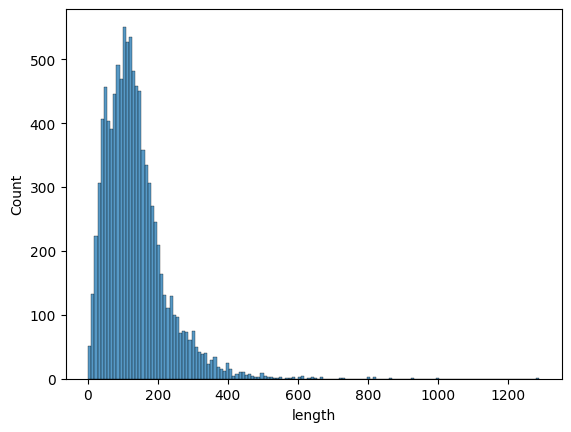

In [260]:
sns.histplot(x=df_m['length'])

In [261]:
# Checking if we are in need of filtering the descriptions by length.
df_m[df_m["length"] < 25]
# For now I keep all of them.
# Drop the length column because not needed anymore after filtering.
df_m.drop("length", axis=1)

,bookID,genre,description
0,1,Fantasy,"It is the middle of the summer, but there is a..."
1,2,Fantasy,Harry Potter is about to start his fifth year ...
2,4,Fantasy,The Dursleys were so mean and hideous that sum...
3,5,Fantasy,"Harry Potter, along with his best friends, Ron..."
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...
...,...,...,...
11117,45630,Fiction,From the acclaimed author of The Rainbow Stori...
11118,45631,Fiction,William T. Vollmann is one of our greatest liv...
11119,45633,Fiction,"In the jungles of South America, on the ice fi..."
11120,45634,Historical Fiction,The time is the tenth century A.D. The newcome...


### Merging reviews

In [262]:
import nltk
from sklearn.model_selection import train_test_split

In [263]:
descriptions = []
corpus=[]
for description in df_m['description']:
    descriptions.append(description)
    corpus.append(nltk.sent_tokenize(description))

In [264]:
# Sentences in all the reviews. But each review is in one list so we have to flatten it.
# corpus

In [265]:
# Reviews as strings.
# reviews

In [266]:
## flatten the list
corpus=[sent for sublist in corpus for sent in sublist]

### Text cleaning

In [267]:
import re
from bs4 import BeautifulSoup

In [268]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    corpus[i] = re.sub(r'\W+',' ',corpus[i]) # Replace everything non-alpahnumeric by ' '
    corpus[i] = re.sub(r'\d+',' ',corpus[i]) # Replace one or more digits by  ' '
    corpus[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus[i]) 
    # Replace html tags by ''
    corpus[i] = BeautifulSoup(corpus[i], 'html.parser').get_text().strip()
    corpus[i] = re.sub(r'\s+',' ',corpus[i]) # Replace one or more whitespaces by  ' '
    corpus[i] = re.sub(" ll ", "", corpus[i])

In [269]:
wordfreq = {}
for sentence in corpus:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if (word not in wordfreq.keys()): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter

In [270]:
len(list(wordfreq.keys()))

54072

In [271]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))
# stop_words

In [272]:
# Cleaning the stopwords
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
#stop_words

In [273]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [274]:
# corpus

In [275]:
corpus.sort(reverse = True)
# corpus

In [276]:
len(corpus)

53922

In [277]:
corpus_freq = [(word[1],word[0]) for word in corpus[:5000]]
# corpus_freq

### Stemming

In [496]:
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
lem = WordNetLemmatizer()

corpus_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_freq]

In [497]:
cols = {word[0]: [] for word in corpus_freq}
descriptions = pd.DataFrame(cols)

descriptions

,one,new,life,world,book,first,story,time,man,love,...,rumor,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit


In [498]:
# list(cols.keys())

In [499]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a descriptions and returns a dictionary of word frequencies
    Inputs:
    sentence -> description: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the description in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding description
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the description
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [500]:
my_list = list( map(review_inpector, df_m['description'], [stop_words]*df_m.shape[0], [list(cols.keys())]*df_m.shape[0] ) )

In [501]:
# my_list[:1]
# Validation
# When we compare this match with bookID=1 (Harry Potter and the Half-Blood Prince), the words are matching to the description.

In [502]:
len(my_list)

10039

In [503]:
descriptions = pd.DataFrame(my_list)

In [504]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,rumor,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [505]:
descriptions['target_genre'] = df_m['genre'].reset_index(drop=True)

In [506]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit,target_genre
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Fiction
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


### Calling genres that has less than 4 books "Other"

In [507]:
'''
# Count the number of rows for each genre
counts = descriptions['target_genre'].value_counts()

# Create a list of genre names with a count less than 3
other_genres = list(counts[counts < 4].index)

# Replace the genre names with "Other" for rows with those genre names
descriptions.loc[descriptions['target_genre'].isin(other_genres), 'target_genre'] = "Other"

descriptions["target_genre"].value_counts()
'''

'\n# Count the number of rows for each genre\ncounts = descriptions[\'target_genre\'].value_counts()\n\n# Create a list of genre names with a count less than 3\nother_genres = list(counts[counts < 4].index)\n\n# Replace the genre names with "Other" for rows with those genre names\ndescriptions.loc[descriptions[\'target_genre\'].isin(other_genres), \'target_genre\'] = "Other"\n\ndescriptions["target_genre"].value_counts()\n'

In [508]:
descriptions

,one,new,life,world,book,first,story,time,man,love,...,removed,reliable,refused,realization,ranma,ranger,quintessential,pushkin,profit,target_genre
0,1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,Fiction
10035,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,Fiction
10037,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


# Defining a function to clean a description

In [509]:
def clean_review(x):
    x = str(x).lower().replace("\\","").replace("_"," ")
    x = re.sub(r'\W+',' ',x) # Replace everything non-alpahnumeric by ' '
    x = re.sub(r'\s+',' ',x) # Replace one or more whitespaces by  ' '
    x = re.sub(r'\d+',' ',x) # Replace one or more digits by  ' '
    x = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", x) # Replace e-mails by ''
    # Replace urls by ''
    x = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , x) 
    # Replace html tags by ''
    x = BeautifulSoup(x, 'html.parser').get_text().strip()
    x = x.replace(' br ',' ')

    return x

In [510]:
df_m.head()

,bookID,genre,description,length
0,1,Fantasy,"It is the middle of the summer, but there is a...",122
1,2,Fantasy,Harry Potter is about to start his fifth year ...,104
2,4,Fantasy,The Dursleys were so mean and hideous that sum...,157
3,5,Fantasy,"Harry Potter, along with his best friends, Ron...",78
4,8,Fantasy,Box Set containing Harry Potter and the Sorcer...,39


In [511]:
descriptions_cleaned = df_m.copy()

In [512]:
descriptions_cleaned = descriptions_cleaned[['description','genre']]

In [513]:
descriptions_cleaned['description'] = descriptions_cleaned['description'].apply(lambda x: clean_review(x))

In [514]:
descriptions_cleaned

,description,genre
0,it is the middle of the summer but there is an...,Fantasy
1,harry potter is about to start his fifth year ...,Fantasy
2,the dursleys were so mean and hideous that sum...,Fantasy
3,harry potter along with his best friends ron a...,Fantasy
4,box set containing harry potter and the sorcer...,Fantasy
...,...,...
11117,from the acclaimed author of the rainbow stori...,Fiction
11118,william t vollmann is one of our greatest livi...,Fiction
11119,in the jungles of south america on the ice fie...,Fiction
11120,the time is the tenth century a d the newcomer...,Historical Fiction


# TF-IDF 

In [515]:
from sklearn.feature_extraction.text import TfidfVectorizer

tidf = TfidfVectorizer(max_features = 2000, ngram_range = (1,4), analyzer = 'word', stop_words = stop_words)

In [516]:
X = tidf.fit_transform(descriptions_cleaned['description'])
y = descriptions_cleaned["description"]

In [517]:
#tidf.get_feature_names()
tidf_list_of_words=tidf.get_feature_names_out()

In [518]:
len(tidf.get_feature_names_out())

2000

In [519]:
tidf_list_of_words

array(['abandoned', 'ability', 'able', ..., 'young woman', 'younger',
       'youth'], dtype=object)

In [520]:
tidf_list_of_words[0:50]

array(['abandoned', 'ability', 'able', 'academy', 'access', 'accessible',
       'accident', 'acclaimed', 'accompanied', 'according', 'account',
       'accounts', 'achieve', 'achievement', 'across', 'act', 'action',
       'actually', 'adams', 'addition', 'adult', 'adventure',
       'adventures', 'advice', 'affair', 'africa', 'african', 'age',
       'agent', 'ages', 'ago', 'ahead', 'air', 'alex', 'alice', 'alien',
       'alike', 'alive', 'almost', 'alone', 'along', 'along way',
       'already', 'also', 'also included', 'also includes', 'alternate',
       'alternate cover', 'although', 'always'], dtype=object)

In [521]:
descriptions_tidf = pd.DataFrame(columns=tidf_list_of_words)

In [522]:
descriptions_tidf

,abandoned,ability,able,academy,access,accessible,accident,acclaimed,accompanied,according,...,york times,york times bestselling,york times bestselling author,york times book,york times book review,young,young man,young woman,younger,youth


In [523]:
# Matching all the description words to the words chosen.
my_list_tidf = list( map(review_inpector, df_m['description'], [stop_words]*df_m.shape[0], [tidf_list_of_words]*df_m.shape[0] ) )

In [524]:
descriptions_tidf = pd.DataFrame(my_list_tidf)

In [525]:
descriptions_tidf

,abandoned,ability,able,academy,access,accessible,accident,acclaimed,accompanied,according,...,york times,york times bestselling,york times bestselling author,york times book,york times book review,young,young man,young woman,younger,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [526]:
descriptions_tidf['target_genre'] = df_m['genre'].reset_index(drop=True)

In [527]:
descriptions_tidf

,abandoned,ability,able,academy,access,accessible,accident,acclaimed,accompanied,according,...,york times bestselling,york times bestselling author,york times book,york times book review,young,young man,young woman,younger,youth,target_genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Fantasy
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fiction
10036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Fiction
10037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Historical Fiction


### Filtering genres that has less than 4 books and calling them "Other"

In [528]:
'''
# Count the number of rows for each genre
counts = descriptions_tidf['target_genre'].value_counts()

# Create a list of genre names with a count less than 3
other_genres = list(counts[counts < 4].index)

# Replace the genre names with "Other" for rows with those genre names
descriptions_tidf.loc[descriptions['target_genre'].isin(other_genres), 'target_genre'] = "Other"

descriptions_tidf["target_genre"].value_counts()
'''

'\n# Count the number of rows for each genre\ncounts = descriptions_tidf[\'target_genre\'].value_counts()\n\n# Create a list of genre names with a count less than 3\nother_genres = list(counts[counts < 4].index)\n\n# Replace the genre names with "Other" for rows with those genre names\ndescriptions_tidf.loc[descriptions[\'target_genre\'].isin(other_genres), \'target_genre\'] = "Other"\n\ndescriptions_tidf["target_genre"].value_counts()\n'

### Filtering top 10 genres by value counts

In [529]:
descriptions_non_filtered = descriptions

grouped = descriptions.groupby('target_genre')['target_genre'].count()

filtered_genres = grouped[grouped > 100].index.to_list()
filtered_genres

# Filtering the data to keep only top 10 genres.
descriptions = descriptions[descriptions['target_genre'].isin(filtered_genres)]

# Checking the counts.
descriptions['target_genre'].value_counts()

Fiction               1663
Classics               906
Nonfiction             760
Fantasy                732
Mystery                544
History                443
Philosophy             353
Science Fiction        321
Historical Fiction     289
Horror                 229
Romance                223
Biography              191
Manga                  189
Poetry                 186
Short Stories          184
Childrens              176
Young Adult            172
Picture Books          139
Science                131
Comics                 118
Name: target_genre, dtype: int64

### Filtering specific genres

### Inspecting the number of genres

<AxesSubplot: xlabel='target_genre', ylabel='count'>

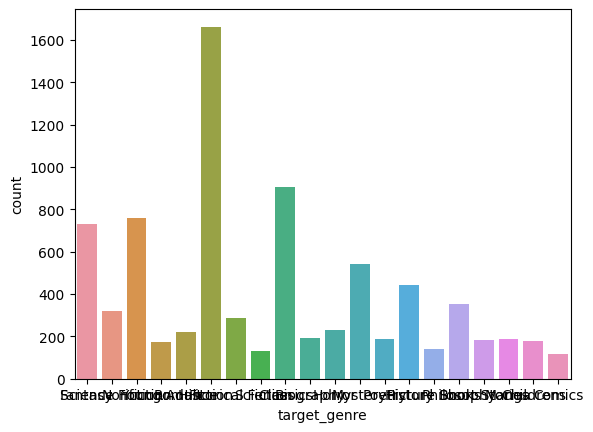

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x=descriptions['target_genre'])

### X y split

### Tidf dataset X y split

In [482]:
'''
# I just changed descriptions here to descriptions_tidf to train the model with descriptions_tidf.
X = descriptions_tidf.drop(columns='target_genre')
y = descriptions_tidf['target_genre']
'''

"\n# I just changed descriptions here to descriptions_tidf to train the model with descriptions_tidf.\nX = descriptions_tidf.drop(columns='target_genre')\ny = descriptions_tidf['target_genre']\n"

### Bag of words X y split

In [569]:
X = descriptions.drop(columns='target_genre')
y = descriptions['target_genre']

# Train test split

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Target class balancing

## Downsampling

In [548]:
# Function for downsampling

def down_samp_rand(Xin, yin):
        from imblearn.under_sampling import RandomUnderSampler
        """Downsamples majority class using random sampling.
        Ratio argument is the ratio of minority class to the downsampled majority
        """
        rus = RandomUnderSampler(random_state=42)
        X_rus, y_rus = rus.fit_resample(Xin, yin)
        return X_rus, y_rus

In [549]:
# X_train, y_train = down_samp_rand(X_train, y_train)

## Upsampling

In [550]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Convert the resampled data back to a pandas dataframe
X_train_resampled_df = pd.DataFrame(X_train_resampled.toarray(), columns=vectorizer.get_feature_names())
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['target_variable'])
train_resampled_data = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE: ", y_train.value_counts())
print("Class distribution after SMOTE: ", y_train_resampled_df['target_variable'].value_counts())
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom imblearn.over_sampling import SMOTE\n\n# Vectorize the text using TF-IDF\nvectorizer = TfidfVectorizer()\nX_train_vec = vectorizer.fit_transform(X_train)\n\n# Apply SMOTE to the training set only\nsmote = SMOTE(sampling_strategy=\'minority\', k_neighbors=5)\nX_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)\n\n# Convert the resampled data back to a pandas dataframe\nX_train_resampled_df = pd.DataFrame(X_train_resampled.toarray(), columns=vectorizer.get_feature_names())\ny_train_resampled_df = pd.DataFrame(y_train_resampled, columns=[\'target_variable\'])\ntrain_resampled_data = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)\n\n# Print the class distribution before and after SMOTE\nprint("Class distribution before SMOTE: ", y_train.value_counts())\nprint("Class distribution after SMOTE: ", y_train_resampled_df[\'target_variable\'].value_counts())\n'

# Naive Bayes Classification

### Initializing the model to a variable.

In [571]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Doing the predictions

In [572]:
# Prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Random forest

In [579]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "max_features":None,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)

print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))


train prediction accuracy score: 0.31
test prediction accuracy score: 0.30


### Hyper paramater tuning

In [574]:
from sklearn.model_selection import GridSearchCV

def hyper_forest(X_train, y_train, X_test, y_test):
    param_grid = {
        'n_estimators': [50,100,200],
        'min_samples_split': [2, 4],
        'min_samples_leaf' : [1, 2],
        'max_features': ['sqrt']
        ##'max_samples' : ['None', 0.5],
        ##'max_depth':[3,5,10],
        ## 'bootstrap':[True,False]
        }
    clf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_ #To check the best set of parameters returned
    best_score = grid_search.best_score_
    # Create a Complement Naive Bayes classifier with the best parameters
    clf_best = RandomForestClassifier(**best_params
                   #penalty=best_params['penalty'],loss=best_params['loss']
                  )
    # Fit the classifier to the training data
    clf_best.fit(X_train, y_train)
    # Make predictions on the test data
    y_test_pred = clf_best.predict(X_test)
    y_train_pred=clf_best.predict(X_train)
    # Compute accuracy on the test data
    accuracy = accuracy_score(y_test, y_test_pred)
    # Print the best parameters and score
    print("Best parameters:", best_params)
    print("Best score:", best_score)
    return y_test_pred, y_train_pred, clf_best

In [580]:
hyper_forest(X_train, y_train, X_test, y_test)

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.47900739278238796


(array(['Fantasy', 'Fiction', 'Fiction', ..., 'Classics', 'Fiction',
        'Fiction'], dtype=object),
 array(['Picture Books', 'Mystery', 'Mystery', ..., 'Horror', 'Romance',
        'Poetry'], dtype=object),
 RandomForestClassifier(n_estimators=500))

### Performance metrics

In [576]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [577]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred, average='macro'),
                                         recall_score(y_train, y_train_pred, average='macro')],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred, average='macro'),
                                        recall_score(y_test, y_test_pred, average='macro')]})

performance_log

,Error_metric,Train,Test
0,Accuracy,0.810505,0.574214
1,Precision,0.819726,0.542460
2,Recall,0.843521,0.516900


### Classification Report

In [578]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

         Biography       0.28      0.22      0.25        32
         Childrens       0.38      0.33      0.35        36
          Classics       0.63      0.56      0.60       216
            Comics       0.64      0.33      0.44        21
           Fantasy       0.66      0.78      0.71       146
           Fiction       0.54      0.57      0.55       318
Historical Fiction       0.51      0.53      0.52        55
           History       0.71      0.68      0.70       101
            Horror       0.47      0.55      0.51        33
             Manga       0.52      0.39      0.44        36
           Mystery       0.59      0.77      0.66       107
        Nonfiction       0.57      0.51      0.54       138
        Philosophy       0.70      0.70      0.70        76
     Picture Books       0.44      0.44      0.44        27
            Poetry       0.54      0.50      0.52        42
           Romance       0.46      0.61

In [558]:
xtest123 = X_test[0:10]
ytest123 = y_test[0:10]

# Predict Output
predicted = model.predict(xtest123)

print("Actual Value:", ytest123)
print("Predicted Value:", predicted[0:10])

Actual Value: 1421               Fantasy
2794               Fiction
4017    Historical Fiction
1727         Short Stories
4011         Picture Books
1434           Young Adult
2813                Horror
3859               Fantasy
7727              Classics
9356              Classics
Name: target_genre, dtype: object
Predicted Value: ['Fantasy' 'Fiction' 'Historical Fiction' 'Fiction' 'Fiction' 'Fiction'
 'Horror' 'Fantasy' 'Classics' 'Classics']


In [559]:
ytest123

1421               Fantasy
2794               Fiction
4017    Historical Fiction
1727         Short Stories
4011         Picture Books
1434           Young Adult
2813                Horror
3859               Fantasy
7727              Classics
9356              Classics
Name: target_genre, dtype: object

In [560]:
predicted[0:10]

array(['Fantasy', 'Fiction', 'Historical Fiction', 'Fiction', 'Fiction',
       'Fiction', 'Horror', 'Fantasy', 'Classics', 'Classics'],
      dtype='<U18')

In [568]:
descriptions['target_genre'].value_counts()

Fiction               1663
Classics               906
Nonfiction             760
Fantasy                732
Mystery                544
History                443
Philosophy             353
Science Fiction        321
Historical Fiction     289
Horror                 229
Romance                223
Biography              191
Manga                  189
Poetry                 186
Short Stories          184
Childrens              176
Young Adult            172
Picture Books          139
Science                131
Comics                 118
Name: target_genre, dtype: int64